### AgglomerativeClustering with Different Linkage Techniques

In [25]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [27]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

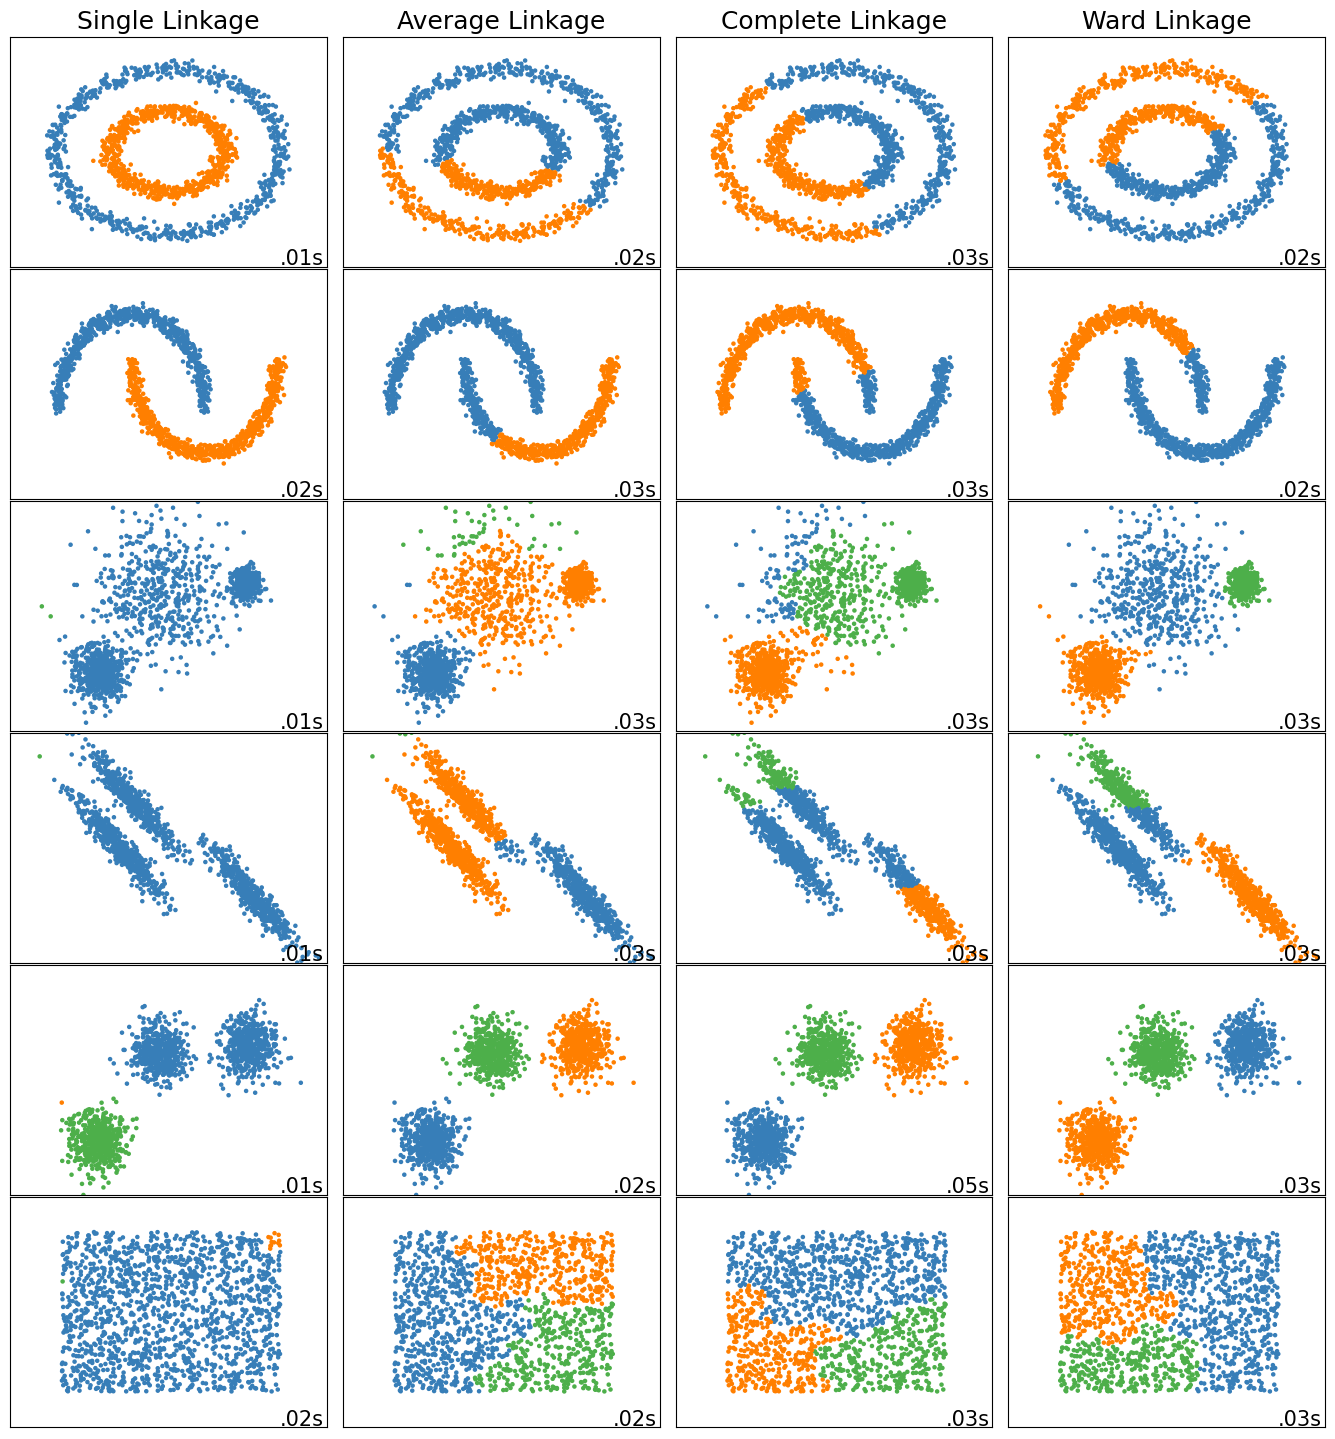

In [48]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)  
    
    #noisy_circles - {"n_neighbors": 10, "n_clusters": 2}
    #noisy_moons - {"n_neighbors": 10, "n_clusters": 2}
    #varied - {"n_neighbors": 2, "n_clusters": 3}
    #aniso - {"n_neighbors": 2, "n_clusters": 3}
    #noisy_circles - {"n_neighbors": 10, "n_clusters": 3}
    #no_Strucutre - {"n_neighbors": 10, "n_clusters": 3}
    
    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)      # xlim - x axis range
        plt.ylim(-2.5, 2.5)
        plt.xticks(())           # xticks - if empty list passed then nothing is visible in x-axis
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

    #noisy_circles - {"n_neighbors": 10, "n_clusters": 2}
    #noisy_moons - {"n_neighbors": 10, "n_clusters": 2}
    #varied - {"n_neighbors": 2, "n_clusters": 3}
    #aniso - {"n_neighbors": 2, "n_clusters": 3}
    #noisy_circles - {"n_neighbors": 10, "n_clusters": 3}
    #no_Strucutre - {"n_neighbors": 10, "n_clusters": 3}

As we refer above plots we can notice that:

1)Single linkage - forms chain and clustering mostly continous.

2)Average linkage - most like K-Means clustering as it forms convex shape.

3)Complete linkage - mostly form round shaped clustering.

### BloomFilter

In [49]:
!pip install fastbloom_rs

  Obtaining dependency information for fastbloom_rs from https://files.pythonhosted.org/packages/c3/ff/75a48cc21620952f7b4cb29d039d526bafdd4a8e7b22d4821c4401149022/fastbloom_rs-0.5.9-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/177.5 kB ? eta -:--:--
   -- ------------------------------------- 10.2/177.5 kB ? eta -:--:--
   ------ -------------------------------- 30.7/177.5 kB 640.0 kB/s eta 0:00:01
   --------- ----------------------------- 41.0/177.5 kB 487.6 kB/s eta 0:00:01
   --------- ----------------------------- 41.0/177.5 kB 487.6 kB/s eta 0:00:01
   --------- ----------------------------- 41.0/177.5 kB 487.6 kB/s eta 0:00:01
   ------------- ------------------------- 61.4/177.5 kB 233.8 kB/s eta 0:00:01
   -------------------- ------------------ 92.2/177.5 kB 327.7 kB/s eta 0:00:01
   ------------------------------ ------- 143.4/177.5 kB 425.3 kB/s eta 0:00:01
   ------------------------------ ------- 143.4/177.5 kB 425.3 kB/s eta 0:00:01
 

In [99]:
from fastbloom_rs import BloomFilter

bloom = BloomFilter(100_000_000, 0.1)
from nltk.util import ngrams

text = '''The numpy sieve with trial division is actually a pretty fast Python
implementation. I've done some benchmarks in the past and saw around of 2-3x or so slower 
than a similar C++ implementation and less than an order of magnitude slower than C.'''
text = text.lower()
text = text.split()
punctuation_removed_text = ""
for word in text:
    if word[-1]==".":
        punctuation_removed_text+=word[:-1]
    else:
        punctuation_removed_text+=word
    punctuation_removed_text+=" "

tokens = [token for token in punctuation_removed_text.split(" ") if token != ""]
text_length = len(punctuation_removed_text.split())

different_phrases = []
for token_length in range(1, text_length+1):
    for token in list(ngrams(tokens, token_length)):
        different_phrases.append(token)

for gram in different_phrases:
    word = " ".join(gram)
    bloom.add(word)

print(bloom.contains("numpy sieve with trial division"))

inserts = [1, 2, 3, 4, 5, 6, 7, 9, 18, 68, 90, 100]
bloom.add_int_batch(inserts)
checks = [1, 2, 3, 4, 5, 6, 7, 9, 18, 68, 90, 100, 190, 290, 390]
contains = bloom.contains_int_batch(checks)

print(contains)

True
[True, True, True, True, True, True, True, True, True, True, True, True, False, False, False]


### L0 norm:

It is the count of non-zero components in a vector.

ex:
    x = [1 2 3 0 4 0] --- L0 norm of vector x = 4 

### Clustering Indices

Here are a few commonly used clustering indices:

Silhouette Score: This score compares the similarity of data points within the same cluster to data points in different clusters1. It ranges from -1 (poor clustering) to +1 (perfect clustering). A score close to 1 suggests well-separated clusters1.

Davies-Bouldin Index: This index estimates the average similarity between each cluster and its most comparable cluster1. It evaluates the clustering quality by considering both the separation between clusters and their compactness1. Lower numbers suggest better clustering solutions1.

Calinski-Harabasz Index (Variance Ratio Criterion): This index measures the ratio of between-cluster variance to within-cluster variance1. It assesses the quality of clustering based on the separation between clusters and the compactness of data points within each cluster1. Higher numbers suggest better-defined clusters1.

Adjusted Rand Index (ARI): This index assesses the similarity between genuine class labels and predicted cluster labels1. It measures the quality of clustering by comparing how well the clusters align with the true class labels1. It ranges from -1 to 1, where 1 indicates perfect clustering, 0 indicates random clustering, and negative values suggest poor clustering1.

Dunn Index: Dunn index is the ratio of the minimum of inter-cluster distances and maximum of intracluster distances. We want to maximize the Dunn index. The more the value of the Dunn index, the better the clusters will be. Let’s understand the intuition behind the Dunn index:

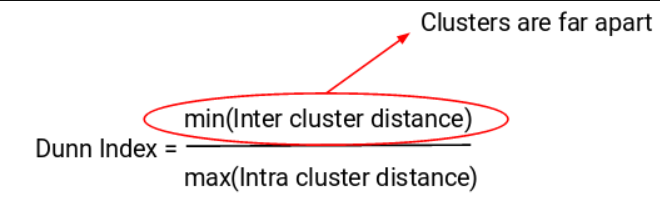

## K-Means Clustering without importing library

In [88]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv("C:/Users/keerthivasan.s/Downloads/clustering.csv")
pd.set_option('display.max_columns', None) 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


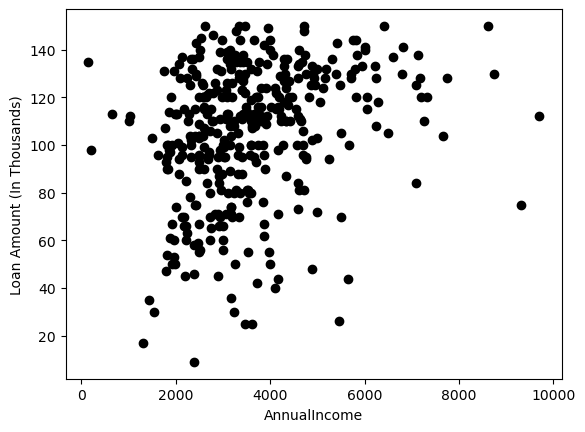

In [90]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

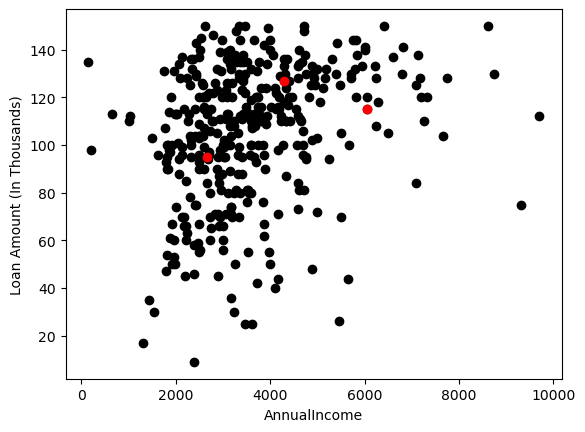

In [94]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [95]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

-22.651379829876888
-46.62620125623839
-64.86172565595378
-9.190752402517077
-9.19844100901777
-9.237706177129652
0.0


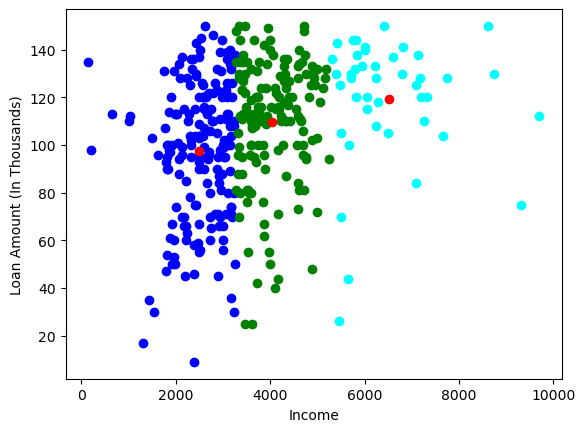

In [98]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set a random seed for reproducibility
np.random.seed(0)

# Generate a helix along the x-axis
n = 1000  # number of points
theta_max = 8 * np.pi  # maximum angle
theta = np.linspace(0, theta_max, n)  # array of angles
z = np.linspace(-1, 1, n)  # uniformly distributed heights
r = z**2 + 1  # radius
x = r * np.sin(theta)
y = r * np.cos(theta)

labels = np.zeros(n)


# Generate a second helix as a mirror image of the first
x2 = -x
y2 = -y
labels = np.concatenate((labels, np.ones(n)))
# Create a scatter plot for the second helix



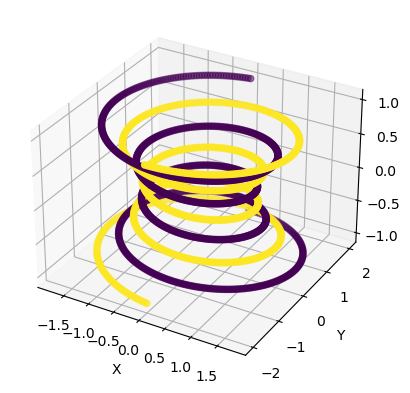

In [62]:
helical_dataset_x = np.concatenate((x,x2))
helical_dataset_y = np.concatenate((y,y2))
helical_dataset_z = np.concatenate((z,z))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(helical_dataset_x,helical_dataset_y, helical_dataset_z, c=labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [63]:
import pandas as pd
data = {'X' : helical_dataset_x,
        'Y' : helical_dataset_y,
        'Z' : helical_dataset_z,
        }
 
df = pd.DataFrame(data)



<function matplotlib.pyplot.show(close=None, block=None)>

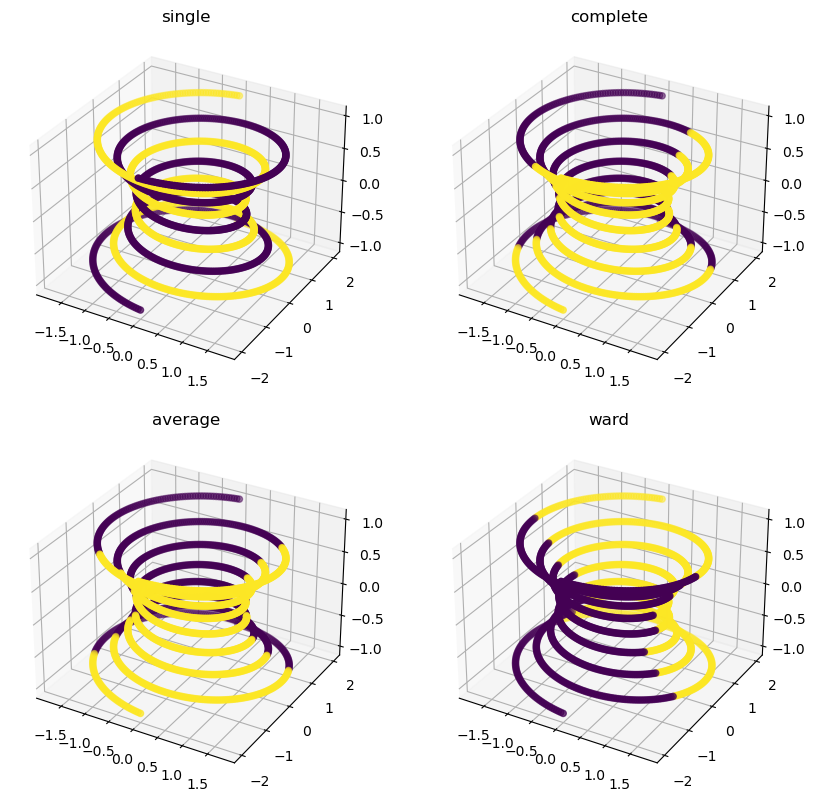

In [70]:
from sklearn import cluster

linkages = ["single", "complete", "average", "ward"]
plot_num = 1
fig = plt.figure(figsize = (10,10))
for linkage in linkages:
    agglo_cluster = cluster.AgglomerativeClustering(
            n_clusters=2, linkage=linkage
        )

    agglo_cluster.fit(df)
    y_pred = agglo_cluster.labels_.astype(int)

    
    ax = fig.add_subplot(220 + plot_num, projection='3d')
    ax.scatter(df['X'], df['Y'], df['Z'], c = y_pred)
    ax.set_title(linkage)
    plot_num+=1
    
plt.subplots_adjust(wspace=0.2, hspace=0.1)
plt.show
    